In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

BASE = './data'

### Draw Condition Figure

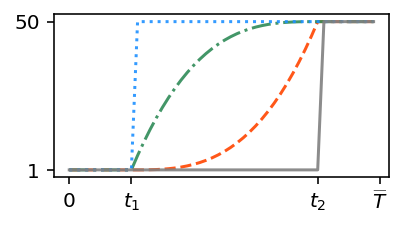

In [ ]:
t2 = 0.8
t1 = 0.2

def easingin(x):
  return (((x-t1)/(t2-t1))**3)

def easingout(x):
  return ((1-((t2-x)/(t2-t1))**3 ))
  
t = np.arange(0, 1, 0.02)
ei = 1 + easingin(t) * 49
eo = 1 + easingout(t) * 49
po = np.ones(t.shape)
bl = np.ones(t.shape)
ei[ei<1] = 1
eo[eo<1] = 1
eo[eo>50] = 50
ei[ei>50] = 50
po[t>t1] = 50
bl[t>t2] = 50

plt.figure(figsize=(3,1.5), dpi=144)
plt.plot(t, ei, color="orangered", ls='--', lw=1.5, alpha=0.9)
plt.plot(t, eo, color="seagreen", ls='-.', lw=1.5, alpha=0.9)
plt.plot(t, po, color="dodgerblue", ls=':', lw=1.5, alpha=0.9)
plt.plot(t, bl, color="gray", lw=1.5, alpha=0.9)
plt.xticks([0.0, 0.2, 0.8, 1.0], ["0", "$t_1$", "$t_2$", "$\widebar{T}$"])
plt.yticks([1.0, 50.0])
# plt.xlabel("Time")
# plt.ylabel("Width")
plt.savefig("easing.svg")
plt.show()

# Expanding Target

In [ ]:
VERSION = '21080616'

## Descriptive

In [ ]:
from scipy.stats import exponnorm

In [ ]:
reactiveness = np.full((12, 13), np.nan)
proactiveness = np.full((12, 13), np.nan)

react_weight = np.full((12, 13), np.nan)
proact_weight = np.full((12, 13), np.nan)
irrelevant_weight = np.full((12, 13), np.nan)

react_K = np.full((12, 13), np.nan)
react_mean = np.full((12, 13), np.nan)
react_loc = np.full((12, 13), np.nan)
react_scale = np.full((12, 13), np.nan)
react_lambda = np.full((12,13), np.nan)
proact_loc = np.full((12, 13), np.nan)
proact_scale = np.full((12, 13), np.nan)

d = []

for i in range(12):
  for j, cond in enumerate([10, 11, 12, 20, 21, 22, 30, 31, 32, 40, 41, 42, '02']):
    path = f"{BASE}/S{101+i}_{cond}_{VERSION}.hdf5"
    f = h5py.File(path, 'r')

    # weight
    w = f['w'][:] 
    react_weight[i,j] = np.nanmean(w[:,:,0])
    proact_weight[i,j] = np.nanmean(w[:,:,1])
    irrelevant_weight[i,j] = np.nanmean(w[:,:,2])
    
    reactiveness[i,j] = np.nanmean(w[:,:,0] / (w[:,:,0]+w[:,:,1]))
    proactiveness[i,j] = np.nanmean(w[:,:,1] / (w[:,:,0]+w[:,:,1]))

    # params
    p = f['p'][:]
    react_K[i,j] = np.nanmean(p[:,:,0])
    react_loc[i,j] = np.nanmean(p[:,:,1])
    react_scale[i,j] = np.nanmean(p[:,:,2])
    react_lambda[i,j] = np.nanmean(1/(p[:,:,0]*p[:,:,2]))
    react_mean[i,j] = np.nanmean(p[:,:,1]+p[:,:,0]*p[:,:,2])
    
    proact_loc[i,j] = np.nanmean(p[:,:,3])
    proact_scale[i,j] = np.nanmean(p[:,:,4])

    if cond == '02':
      d.append([i, -1, -1, reactiveness[i,j], proactiveness[i,j], react_weight[i,j], proact_weight[i,j], irrelevant_weight[i,j],
                  react_mean[i, j], react_lambda[i,j], react_K[i,j], react_loc[i,j], react_scale[i,j], proact_loc[i,j], proact_scale[i,j]])
    else: 
      d.append([i, cond%10, cond//10, reactiveness[i,j], proactiveness[i,j], react_weight[i,j], proact_weight[i,j], irrelevant_weight[i,j],
              react_mean[i, j], react_lambda[i,j], react_K[i,j], react_loc[i,j], react_scale[i,j], proact_loc[i,j], proact_scale[i,j]])

In [ ]:
cols = ['pid', 'easing', 'duration', 'react', 'proact', 'react_weight', 'proact_weight', 'irrelevant_weight',
                              'react_mean','react_lambda', 'react_K', 'react_loc', 'react_scale', 'proact_loc', 'proact_scale']
df = pd.DataFrame(d, columns=cols)
df

,pid,easing,duration,react,proact,react_weight,proact_weight,irrelevant_weight,react_mean,react_lambda,react_K,react_loc,react_scale,proact_loc,proact_scale
0,0,0,1,0.653298,0.346702,0.619149,0.331765,0.048287,0.308725,3.427698e+13,42.591875,0.300913,0.087836,-0.503621,0.041972
1,0,1,1,0.699845,0.300155,0.640337,0.272201,0.087277,0.371314,1.832066e+08,12.129514,0.355396,0.098302,-0.367661,0.037833
2,0,2,1,0.742503,0.257497,0.642956,0.212027,0.144478,0.405282,1.183511e+09,18.603970,0.382986,0.101440,-1.239870,0.039707
3,0,0,2,0.758623,0.241377,0.701063,0.214647,0.084116,0.385371,3.054252e+08,0.040016,0.381806,0.103032,-1.260814,0.038579
4,0,1,2,0.825133,0.174867,0.783091,0.164088,0.052820,0.466408,7.274313e+08,0.034300,0.465331,0.102265,-1.393862,0.050875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,11,2,3,0.821614,0.178386,0.761205,0.161921,0.076827,0.473992,7.845116e+10,0.121055,0.468597,0.105399,-1.407093,0.050514
152,11,0,4,0.574171,0.425829,0.484629,0.349758,0.164316,0.445608,6.037228e+10,6.195199,0.388318,0.099598,-0.009215,0.057528
153,11,1,4,0.845092,0.154908,0.800745,0.140881,0.058151,0.519001,8.805943e+09,0.098822,0.508801,0.115246,-0.834528,0.033516
154,11,2,4,0.830553,0.169447,0.805801,0.158730,0.035420,0.472488,1.068394e+10,0.001227,0.472003,0.101711,-0.501228,0.025124


### Heatmap

In [ ]:
path = f"{BASE}/S{101}_{11}_{VERSION}.hdf5"
f = h5py.File(path, 'r')
w = f['w'][:]
fr = f['f'][:]

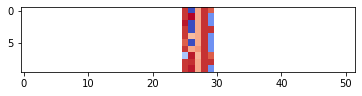

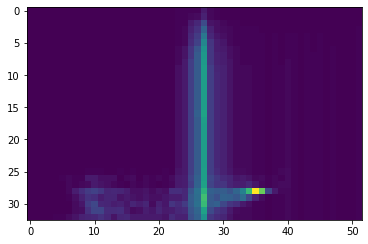

In [ ]:
img = w[10:20,:,0] / (w[10:20,:,0]+w[10:20,:,1])
plt.imshow(img, cmap='coolwarm')
plt.show()
plt.imshow(fr)
plt.show()

### RM ANOVA

In [ ]:
from statsmodels.stats.anova import AnovaRM
sd = df[df['easing'] != -1]
sd.to_csv("study2.csv")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### All

In [ ]:
for dv in ['react', 'proact', 'irrelevant_weight', 'react_mean', 'proact_scale']:
  print(f"DV : {sd}")
  aovrm = AnovaRM(sd, dv, 'pid', within=['easing', 'duration'])
  res = aovrm.fit()
  print(res)

##### significant results only

In [ ]:
for dv in ['react', 'proact', 'irrelevant_weight', 'react_mean', 'proact_scale']:
  aovrm = AnovaRM(sd, dv, 'pid', within=['easing', 'duration'])
  res = aovrm.fit()
  mask = res.anova_table['Pr > F'] < 0.05
  res.anova_table = res.anova_table[mask]
  if len(res.anova_table) > 0:
    print(f"DV : {dv}\n")
    print(res)

DV : react

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
easing   27.5147 2.0000 22.0000 0.0000
duration  7.4048 3.0000 33.0000 0.0006

DV : proact

                Anova
         F Value Num DF  Den DF Pr > F
--------------------------------------
easing   27.5147 2.0000 22.0000 0.0000
duration  7.4048 3.0000 33.0000 0.0006

DV : react_mean

                    Anova
                F Value  Num DF  Den DF Pr > F
----------------------------------------------
easing          138.2131 2.0000 22.0000 0.0000
duration        128.1399 3.0000 33.0000 0.0000
easing:duration   2.5651 6.0000 66.0000 0.0270

DV : proact_scale

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
easing           4.5185 2.0000 22.0000 0.0227
duration         8.9958 3.0000 33.0000 0.0002
easing:duration  2.5281 6.0000 66.0000 0.0290



## Plot of Average PDF

In [ ]:
from scipy.stats import norm, exponnorm

In [ ]:
easingin = df[df['easing'] == 0].mean().to_numpy()[3:]
easingout = df[df['easing'] == 1].mean().to_numpy()[3:]
popup = df[df['easing'] == 2].mean().to_numpy()[3:]

dur2 = df[df['duration'] == 1].mean().to_numpy()[3:]
dur4 = df[df['duration'] == 2].mean().to_numpy()[3:]
dur6 = df[df['duration'] == 3].mean().to_numpy()[3:]
dur8 = df[df['duration'] == 4].mean().to_numpy()[3:]

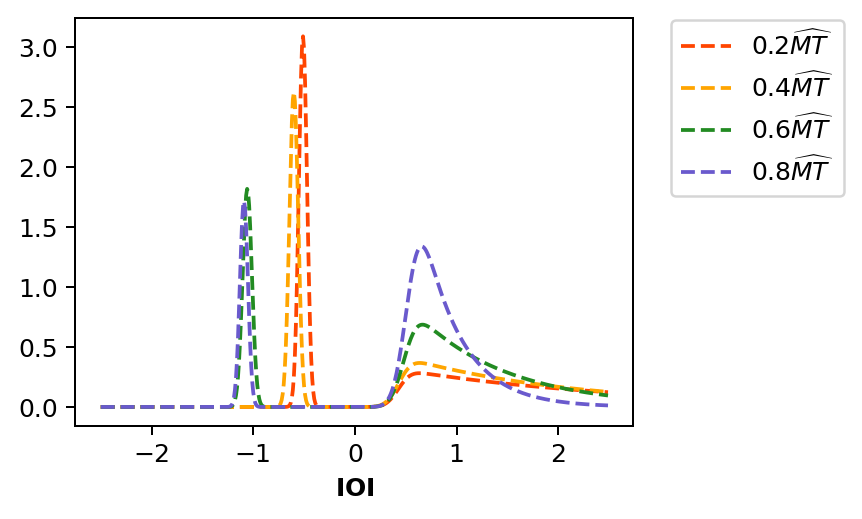

In [ ]:
t = np.arange(-2.5, 2.5, 0.01)

y_dur2 = exponnorm.pdf(t, K=dur2[-5], loc=dur2[-4], scale=dur2[-3]) * dur2[0] + norm.pdf(t, loc=dur2[-2], scale=dur2[-1]) * dur2[1]
y_dur4 = exponnorm.pdf(t, K=dur4[-5], loc=dur4[-4], scale=dur4[-3]) * dur4[0] + norm.pdf(t, loc=dur4[-2], scale=dur4[-1]) * dur4[1]
y_dur6 = exponnorm.pdf(t, K=dur6[-5], loc=dur6[-4], scale=dur6[-3]) * dur6[0] + norm.pdf(t, loc=dur6[-2], scale=dur6[-1]) * dur6[1]
y_dur8 = exponnorm.pdf(t, K=dur8[-5], loc=dur8[-4], scale=dur8[-3]) * dur8[0] + norm.pdf(t, loc=dur8[-2], scale=dur8[-1]) * dur8[1]

plt.figure(figsize=(4,3), dpi=180)
plt.plot(t, y_dur2, label="$0.2 \widehat{MT}$", color="orangered", linestyle='dashed')
plt.plot(t, y_dur4, label="$0.4 \widehat{MT}$", color="orange", linestyle='dashed')
plt.plot(t, y_dur6, label="$0.6 \widehat{MT}$", color="forestgreen", linestyle='dashed')
plt.plot(t, y_dur8, label="$0.8 \widehat{MT}$", color="slateblue", linestyle='dashed')
plt.xlabel("$\mathbf{IOI}$")
plt.legend(bbox_to_anchor=(1.4, 1.025))
plt.show()

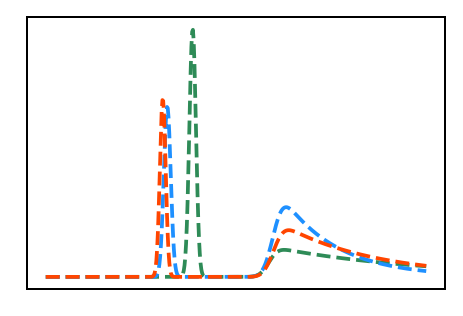

In [ ]:
at = np.arange(-1.5, 1.5, 0.01)

y_easingin = exponnorm.pdf(t, K=easingin[-5], loc=easingin[-4], scale=easingin[-3]) * easingin[0] + norm.pdf(t, loc=easingin[-2], scale=easingin[-1]) * easingin[1]
y_easingout = exponnorm.pdf(t, K=easingout[-5], loc=easingout[-4], scale=easingout[-3]) * easingout[0] + norm.pdf(t, loc=easingout[-2], scale=easingout[-1]) * easingout[1]
y_popup = exponnorm.pdf(t, K=popup[-5], loc=popup[-4], scale=popup[-3]) * popup[0] + norm.pdf(t, loc=popup[-2], scale=popup[-1]) * popup[1]

plt.figure(figsize=(3, 2), dpi=180)
plt.plot(t, y_easingin, label="$easing\ in$", color="seagreen", linestyle='dashed')
plt.plot(t, y_easingout, label="$easing\ out$", color="dodgerblue", linestyle='dashed')
plt.plot(t, y_popup, label="$pop\ up$", color="orangered", linestyle='dashed')
# plt.xlabel("$\mathbf{IOI}$")
plt.xticks([])
plt.yticks([])
# plt.legend(bbox_to_anchor=(1.5, 1.025))
plt.show()


## Box Plot

In [ ]:
easingin = df[df['easing'] == 0].mean().to_numpy()[3:]
easingout = df[df['easing'] == 1].mean().to_numpy()[3:]
popup = df[df['easing'] == 2].mean().to_numpy()[3:]

dur2 = df[df['duration'] == 1].mean().to_numpy()[3:]
dur4 = df[df['duration'] == 2].mean().to_numpy()[3:]
dur6 = df[df['duration'] == 3].mean().to_numpy()[3:]
dur8 = df[df['duration'] == 4].mean().to_numpy()[3:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


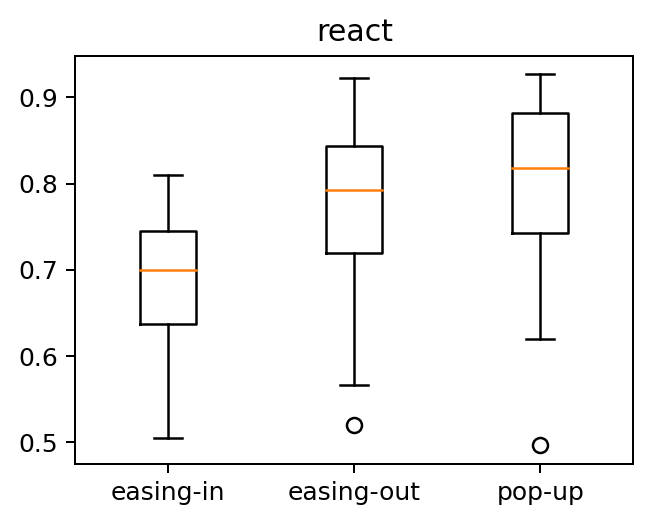

In 0.6904107532089458 0.07233227386061328
Out 0.775902250631241 0.09610558692954758
Pop 0.8019708474857494 0.089661096745619


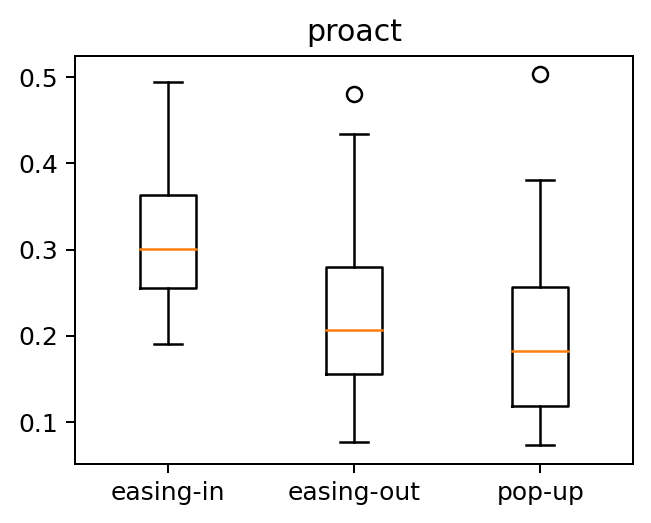

In 0.30958924679105404 0.07233227386061329
Out 0.22409774936875904 0.09610558692954758
Pop 0.19802915251425077 0.089661096745619


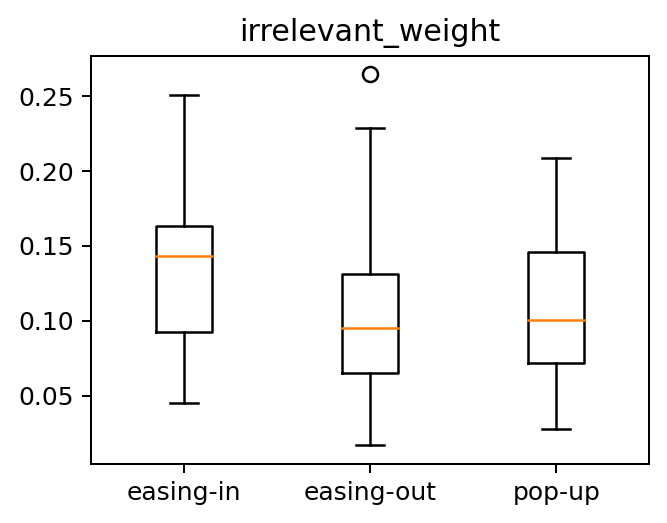

In 0.13400633628936695 0.04839792358223699
Out 0.10339430283900004 0.05408912604845859
Pop 0.10839981123442562 0.050137322437890715


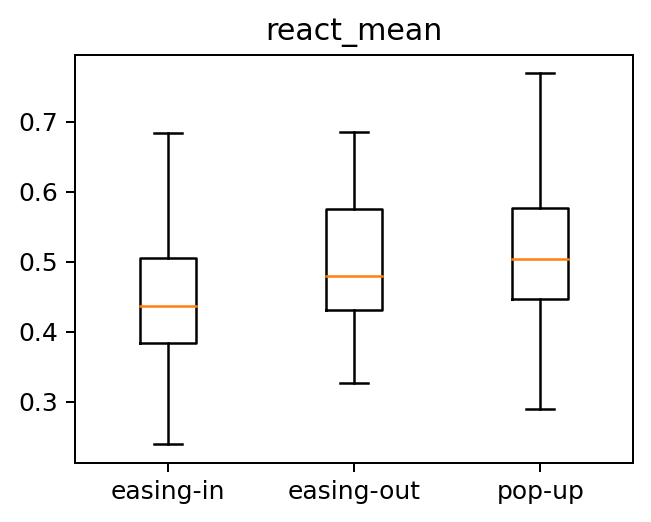

In 0.44160991207120315 0.09905395329168315
Out 0.4996280970835237 0.09212763728706325
Pop 0.5101779215970633 0.10494766218051446


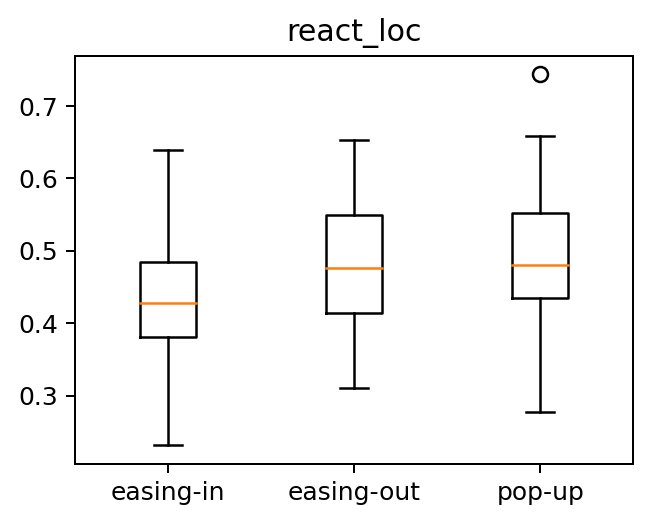

In 0.4261301103905096 0.09030729602567553
Out 0.4861061836533503 0.09152510562738289
Pop 0.4894989375321745 0.09529757058886526


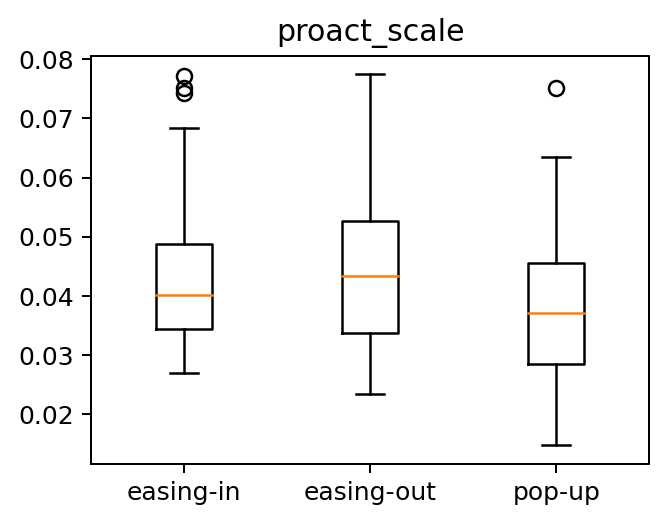

In 0.043051030604578516 0.012349466717005432
Out 0.04531896654114915 0.014180161430034007
Pop 0.03836786178088113 0.012833488597987617


In [ ]:
sd = df[df['easing'] != -1]

ei = sd[df['easing'] == 0]
eo = sd[df['easing'] == 1]
pu = sd[df['easing'] == 2]

for dv in ['react', 'proact', 'irrelevant_weight', 'react_mean', 'react_loc', 'proact_scale']:
  plt.figure(figsize=(4,3), dpi=180)
  plt.title(dv)
  plt.boxplot([ei[dv], eo[dv], pu[dv]])
  plt.xticks([1,2,3], ['easing-in', 'easing-out', 'pop-up'])
  plt.show()
  
  print("In", ei[dv].mean(), ei[dv].std())
  print("Out", eo[dv].mean(), eo[dv].std())
  print("Pop", pu[dv].mean(), pu[dv].std())

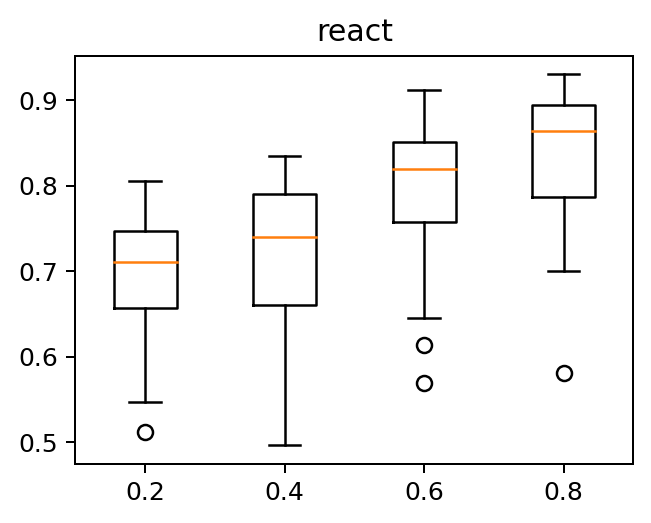

d2 0.6960223934321044 0.07448194170630874
d4 0.7206490583854529 0.08881364274456471
d6 0.7963221827603669 0.0839902661775473
d8 0.8338755996128953 0.08174674782457894


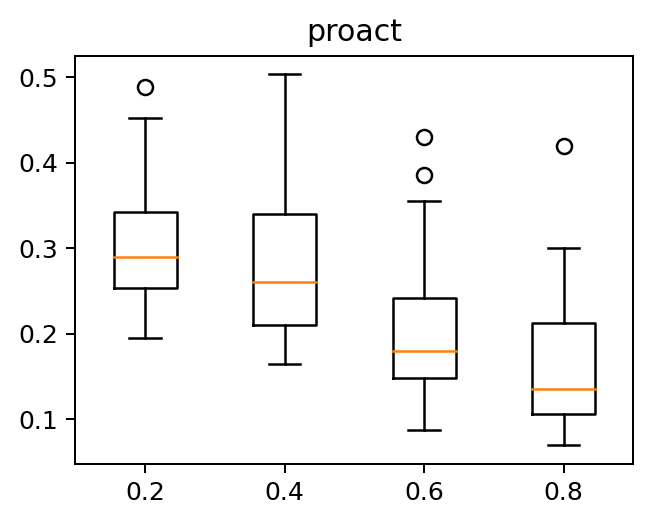

d2 0.3039776065678956 0.07448194170630873
d4 0.2793509416145472 0.08881364274456474
d6 0.20367781723963285 0.0839902661775473
d8 0.16612440038710455 0.08174674782457894


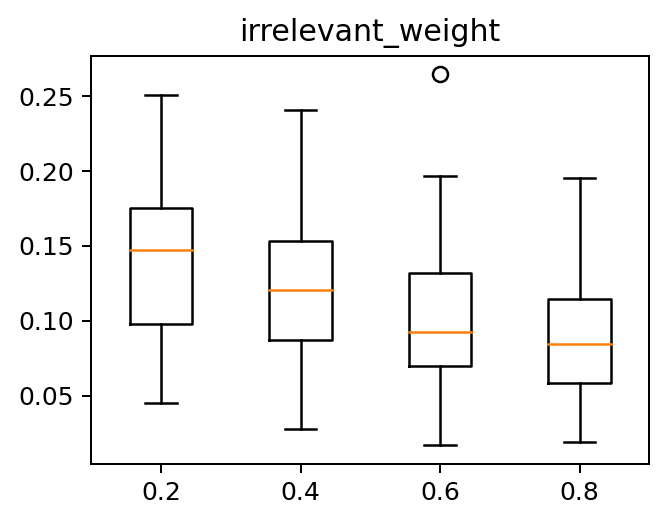

d2 0.14098095453603518 0.05379273623082947
d4 0.12225134465224818 0.045362434677694706
d6 0.10620696163893757 0.05370398491049927
d8 0.09162800632316911 0.0443210843132109


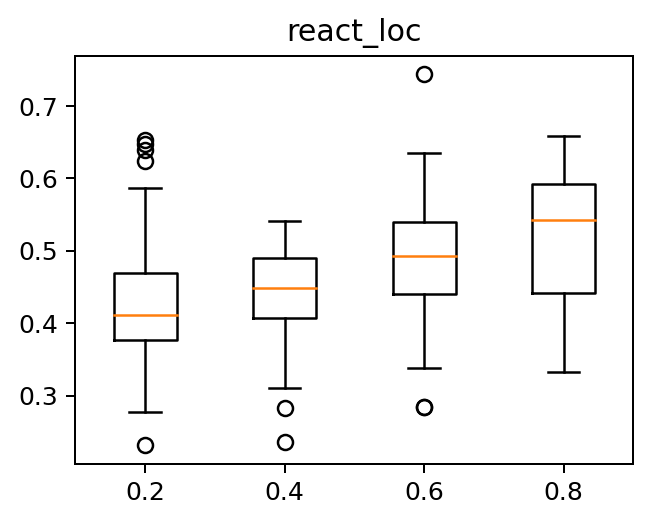

d2 0.42955605360992144 0.10324894165709092
d4 0.433469638702791 0.06960664378290439
d6 0.48631620792018687 0.0932016465832903
d8 0.5196384085351465 0.08864064474781118


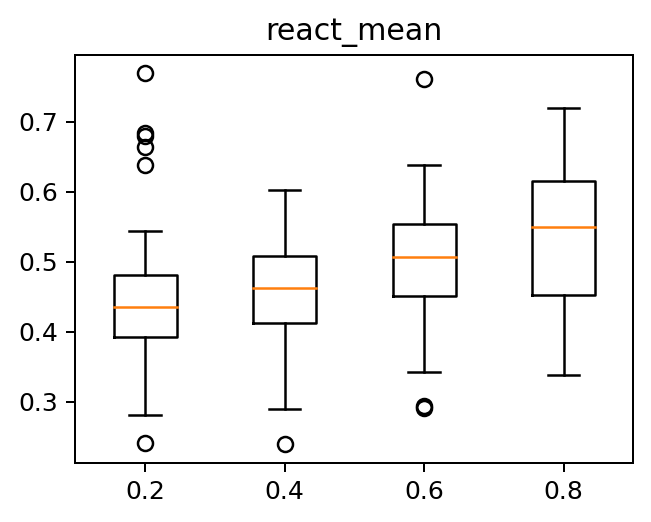

d2 0.45128069482502525 0.11742454863276267
d4 0.4495896053626887 0.07581865947144557
d6 0.49760345262195915 0.09495580696522223
d8 0.5367474881927135 0.09580072588865358


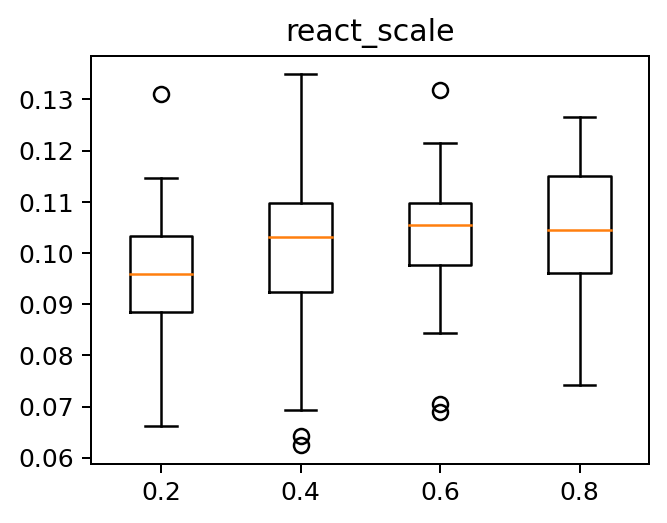

d2 0.0957111235048248 0.013053601933445139
d4 0.100692075264748 0.016595087082802915
d6 0.10363255852411461 0.012529333231570305
d8 0.10517479481797903 0.012522102134373216


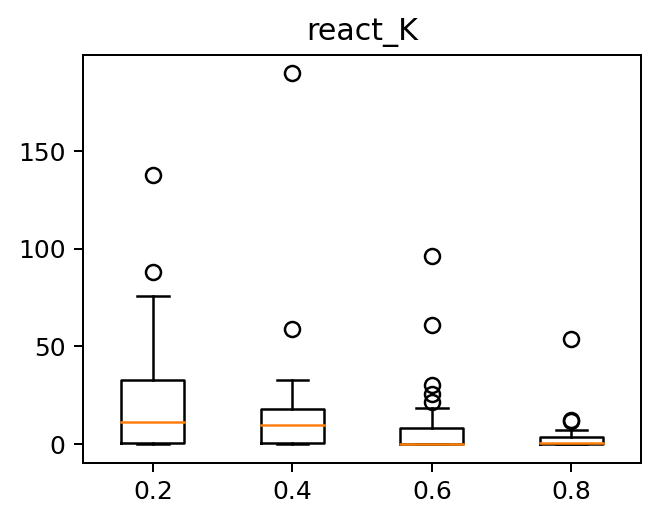

d2 22.899459689336698 29.68718726191263
d4 16.749949845048217 32.3213118755617
d6 8.687601535665092 19.318967716681577
d8 3.619027236468609 9.144163995089368


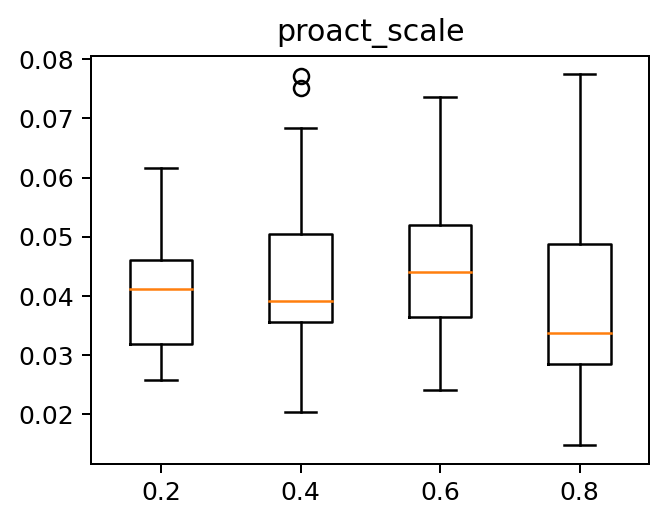

d2 0.04007498677162449 0.009083182024419222
d4 0.043318970265653706 0.01356078402994797
d6 0.04587700879485844 0.012758617123410313
d8 0.039712846070008426 0.01658533461496976


In [ ]:
d2 = df[df['duration'] == 1]
d4 = df[df['duration'] == 2]
d6 = df[df['duration'] == 3]
d8 = df[df['duration'] == 4]

for dv in ['react', 'proact', 'irrelevant_weight', 'react_loc', 'react_mean', 'react_scale', 'react_K', 'proact_scale']:
  plt.figure(figsize=(4,3), dpi=180)
  plt.title(dv)
  plt.boxplot([d2[dv], d4[dv], d6[dv], d8[dv]])
  plt.xticks([1,2,3,4], ['0.2','0.4','0.6','0.8'])
  plt.show()


  print("d2", d2[dv].mean(), d2[dv].std())
  print("d4", d4[dv].mean(), d4[dv].std())
  print("d6", d6[dv].mean(), d6[dv].std())
  print("d8", d8[dv].mean(), d8[dv].std())

## Line Plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/li

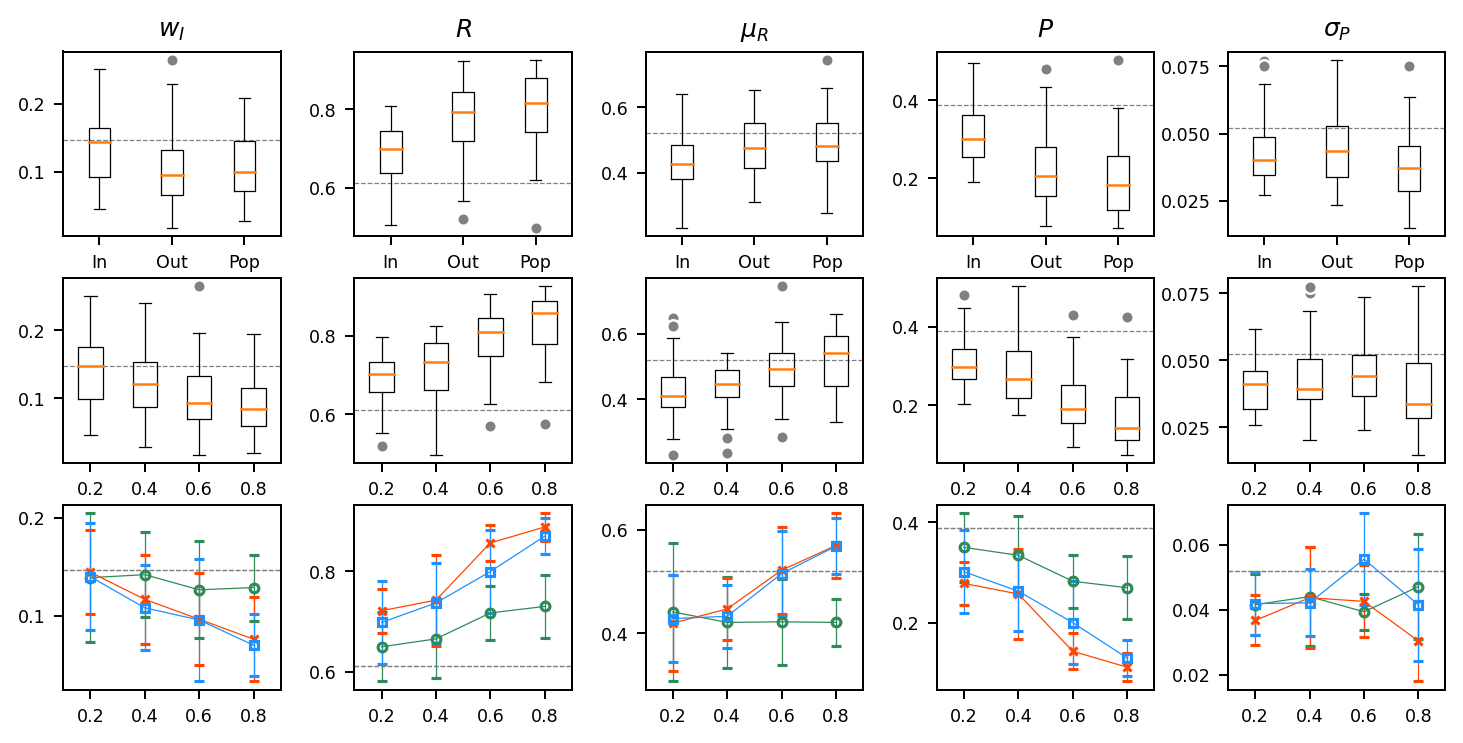

In [ ]:

mask_eo = df['easing'] == 1
mask_ei = df['easing'] == 0
mask_pu = df['easing'] == 2

mask_d1 = df['duration'] == 1
mask_d2 = df['duration'] == 2
mask_d3 = df['duration'] == 3
mask_d4 = df['duration'] == 4

mask_bl = df['duration'] == -1

ei = df[mask_ei]
eo = df[mask_eo]
pu = df[mask_pu]
bl = df[mask_bl]

d2 = df[df['duration'] == 1]
d4 = df[df['duration'] == 2]
d6 = df[df['duration'] == 3]
d8 = df[df['duration'] == 4]


fig = plt.figure(figsize=(8,4), dpi=180)
axs = fig.subplots(3, 5, sharex=False)
for c, col in enumerate(["irrelevant_weight","react", "react_loc", "proact", "proact_scale"]):
  for r, row in enumerate([0, 1, 2]):
    ax = axs[r, c]

    # ax.set_xticklabels([1,2,3], fontsize=8)
    # ax.set_yticklabels([1,2,3], fontsize=8)
    

    # interaction effect
    if r == 0: 
      ax.axhline(y = bl[col].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
      ax.boxplot([ei[col], eo[col], pu[col]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
      ax.set_xticks([1,2,3])
      ax.set_xticklabels(['In', 'Out', 'Pop'])
    if r == 1: 
      ax.axhline(y = bl[col].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
      ax.boxplot([d2[col], d4[col], d6[col], d8[col]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
      ax.set_xlim(0.5, 4.5)
      ax.set_xticks([1, 2, 3, 4])
      ax.set_xticklabels([0.2, 0.4, 0.6, 0.8])
    if r == 2:
      ax.axhline(y = bl[col].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)

      ei_mean = [ei[mask_d1][col].mean(), ei[mask_d2][col].mean(), ei[mask_d3][col].mean(), ei[mask_d4][col].mean()]
      ei_std = [ei[mask_d1][col].std(), ei[mask_d2][col].std(), ei[mask_d3][col].std(), ei[mask_d4][col].std()]
      ax.errorbar([1, 2, 3, 4], ei_mean, yerr=ei_std, fmt='o', ms=3.5, mew=1.25,capsize=2, fillstyle='none',color="seagreen", linestyle='-', linewidth=0.5)
      # ax.scatter([1, 2, 3, 4], ei_mean, color="seagreen", s=3)



      pu_mean = [pu[mask_d1][col].mean(), pu[mask_d2][col].mean(), pu[mask_d3][col].mean(), pu[mask_d4][col].mean()]
      pu_std = [pu[mask_d1][col].std(), pu[mask_d2][col].std(), pu[mask_d3][col].std(), pu[mask_d4][col].std()]
      ax.errorbar([1, 2, 3, 4], pu_mean, yerr=pu_std, fmt='x', ms=3.5, mew=1.25,capsize=2, fillstyle='none',color="orangered", linestyle='-', linewidth=0.5)
      # ax.scatter([1, 2, 3, 4], pu_mean, color="orangered", s=3)

      eo_mean = [eo[mask_d1][col].mean(), eo[mask_d2][col].mean(), eo[mask_d3][col].mean(), eo[mask_d4][col].mean()]
      eo_std = [eo[mask_d1][col].std(), eo[mask_d2][col].std(), eo[mask_d3][col].std(), eo[mask_d4][col].std()]
      ax.errorbar([1, 2, 3, 4], eo_mean, yerr=eo_std, fmt='s', ms=3.5, mew=1.25,capsize=2, fillstyle='none',color="dodgerblue", linestyle='-', linewidth=0.5)
      # ax.scatter([1, 2, 3, 4], eo_mean, color="dodgerblue", s=3)

      ax.axhline(y = bl[col].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)

      ax.set_xlim(0.5, 4.5)
      ax.set_xticks([1, 2, 3, 4])
      ax.set_xticklabels([0.2, 0.4, 0.6, 0.8])

    
    plt.setp(ax.get_yticklabels(), fontsize=7)
    plt.setp(ax.get_xticklabels(), fontsize=7)
    
    
    # set yticks
    # if   col == 'irrelevant_weight':      
    #   ax.set_ylim(0.0, 0.3)
    #   ax.set_yticks([0.1, 0.2])
    # elif col == 'react':    
    #   title = "$R$"
    # elif col == 'react_loc':     
    #   title = "$\mu_R$"
    # elif col == 'proact':   
    #   title = "$P$"
    # elif col == 'proact_scale':  
    #   title = "$\sigma_P$"
    
    # Draw Title
    if r == 0:
      title = None
      if   col == 'irrelevant_weight':      title = '$w_I$'
      elif col == 'react':    title = "$R$"
      elif col == 'react_loc':     title = "$\mu_R$"
      elif col == 'proact':   title = "$P$"
      elif col == 'proact_scale':  title = "$\sigma_P$"
      ax.set_title(title, fontsize=10)
plt.tight_layout(pad=0.25)
plt.savefig("study2.svg")
plt.show()
